In [184]:
import numpy as np
import pandas as pd
import os,sys
import re,operator
from sklearn import model_selection

In [185]:
#Common stop words from online
stop_words = [
"a", "about", "above", "across", "after", "afterwards", 
"again", "all", "almost", "alone", "along", "already", "also",    
"although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", "at", "be", "became", "because", "become","becomes", "becoming", "been", "before", "behind", "being", "beside", "besides", "between", "beyond", "both", "but", "by","can", "cannot", "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for","found", "four", "from", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "i", "ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mine", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part","perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "she", "should","since", "sincere","so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
"this", "those", "though", "through", "throughout",
"thru", "thus", "to", "together", "too", "toward", "towards",
"under", "until", "up", "upon", "us",
"very", "was", "we", "well", "were", "what", "whatever", "when",
"whence", "whenever", "where", "whereafter", "whereas", "whereby",
"wherein", "whereupon", "wherever", "whether", "which", "while", 
"who", "whoever", "whom", "whose", "why", "will", "with",
"within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
]

In [3]:
## THIS CELL WILL TAKE SOME TIME TO EXECUTE
#X is a list of the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/"+category):
        with open("20_newsgroups/"+category+'/'+document, "r") as f:
            X.append(f.read())
            Y.append(category)

In [186]:
# splitting data into train, test
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,random_state=0)

In [187]:
#preparing vocubalary

vocubalary={}
for doc in x_train:
    doc=doc.lower()
    stripped=re.split(r'\W+',doc) ## using regular expressions
    for word in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if word.isalpha() and (word not in stop_words) and len(word)>2:
            vocubalary[word]=vocubalary.get(word,0)+1

In [188]:
#Sorting the vocubalary on basis of frequency of words in descending order
sorted_vocubalary = sorted(vocubalary.items(), key=operator.itemgetter(1),reverse=True)
sorted_vocubalary

[('edu', 123562),
 ('cmu', 39355),
 ('com', 37175),
 ('news', 25765),
 ('srv', 24270),
 ('cantaloupe', 19555),
 ('net', 19162),
 ('message', 16478),
 ('subject', 16240),
 ('lines', 15678),
 ('date', 15599),
 ('apr', 15474),
 ('path', 15290),
 ('newsgroups', 15285),
 ('organization', 14837),
 ('state', 14239),
 ('gmt', 13317),
 ('ohio', 12036),
 ('writes', 11009),
 ('article', 10048),
 ('comp', 9955),
 ('references', 9749),
 ('talk', 9215),
 ('misc', 8968),
 ('ans', 8316),
 ('howland', 8242),
 ('sender', 8236),
 ('reston', 8226),
 ('don', 7862),
 ('people', 7726),
 ('like', 7648),
 ('university', 7467),
 ('just', 7369),
 ('posting', 7319),
 ('nntp', 7021),
 ('mps', 6959),
 ('know', 6705),
 ('host', 6680),
 ('sci', 6622),
 ('zaphod', 6269),
 ('think', 6169),
 ('usenet', 6155),
 ('alt', 5933),
 ('politics', 5842),
 ('windows', 5605),
 ('does', 5384),
 ('time', 5300),
 ('rutgers', 5262),
 ('harvard', 5184),
 ('use', 5170),
 ('near', 5152),
 ('eng', 5128),
 ('new', 4992),
 ('rec', 4845),
 (

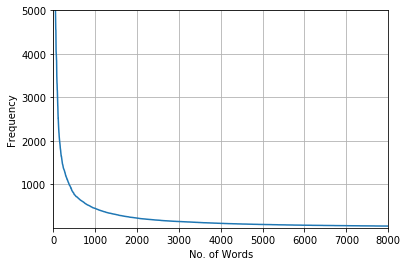

In [189]:
# selecting how many words should we select as our features
import matplotlib.pyplot as plt

x=[]
y=[]

for i in range(len(sorted_vocubalary)):
    x.append(i)
    y.append(sorted_vocubalary[i][1])
    
plt.plot(x,y)
plt.grid()
plt.xlabel("No. of Words")
plt.ylabel("Frequency")
plt.axis([0,8000,1,5000])
plt.show()

In [190]:
# taking out top 2000 words as our features
features=sorted_vocubalary[:2000]
len(features)

2000

In [191]:
features

[('edu', 123562),
 ('cmu', 39355),
 ('com', 37175),
 ('news', 25765),
 ('srv', 24270),
 ('cantaloupe', 19555),
 ('net', 19162),
 ('message', 16478),
 ('subject', 16240),
 ('lines', 15678),
 ('date', 15599),
 ('apr', 15474),
 ('path', 15290),
 ('newsgroups', 15285),
 ('organization', 14837),
 ('state', 14239),
 ('gmt', 13317),
 ('ohio', 12036),
 ('writes', 11009),
 ('article', 10048),
 ('comp', 9955),
 ('references', 9749),
 ('talk', 9215),
 ('misc', 8968),
 ('ans', 8316),
 ('howland', 8242),
 ('sender', 8236),
 ('reston', 8226),
 ('don', 7862),
 ('people', 7726),
 ('like', 7648),
 ('university', 7467),
 ('just', 7369),
 ('posting', 7319),
 ('nntp', 7021),
 ('mps', 6959),
 ('know', 6705),
 ('host', 6680),
 ('sci', 6622),
 ('zaphod', 6269),
 ('think', 6169),
 ('usenet', 6155),
 ('alt', 5933),
 ('politics', 5842),
 ('windows', 5605),
 ('does', 5384),
 ('time', 5300),
 ('rutgers', 5262),
 ('harvard', 5184),
 ('use', 5170),
 ('near', 5152),
 ('eng', 5128),
 ('new', 4992),
 ('rec', 4845),
 (

In [192]:
# Preparing training dataset
training_dataset=[]
for doc in x_train:
    doc=doc.lower()               ## making all alphabets lower case
    stripped=re.split(r'\W+',doc) ## using regular expressions
    
    doc_freq={}  ## frequency of words in a particular document which is to be used to make dataset
    
    for w in stripped:  # preparing doc_freq
        doc_freq[w]=doc_freq.get(w,0)+1
     
    word_count=[] # preparing word count(w.r.t. features) for each dcocument 
    
    for word in features:
        word_count.append(doc_freq.get(word[0],0))
        
    training_dataset.append(word_count)

In [193]:
# Preparing testing dataset
testing_dataset=[]
for doc in x_test:
    doc=doc.lower()               ## making all alphabets lower case
    stripped=re.split(r'\W+',doc) ## using regular expressions
    
    doc_freq={}  ## frequency of words in a particular document which is to be used to make dataset
    
    for w in stripped:  # preparing doc_freq
        doc_freq[w]=doc_freq.get(w,0)+1
     
    word_count=[] # preparing word count(w.r.t. features) for each dcocument 
    
    for word in features:
        word_count.append(doc_freq.get(word[0],0))
        
    testing_dataset.append(word_count)

## sklearn MultinomialNB

In [194]:
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()
clf.fit(training_dataset,y_train)

predictions=clf.predict(testing_dataset)

In [195]:
print("Training Score")
print(clf.score(training_dataset,y_train))
print("Testing Score")
print(clf.score(testing_dataset,y_test))

Training Score
0.8952457158098286
Testing Score
0.8576


In [196]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix for sklearn MultinomialNB")
print()
print(confusion_matrix(y_test,predictions))
print("-----------------------------------------------------------------------------------------")
print("Classification Report for sklearn MultinomialNB")
print()
print(classification_report(y_test,predictions))

Confusion Matrix for sklearn MultinomialNB

[[195   0   0   0   0   0   0   4   1   0   0   0   0   1   0   1   0   0
    0  31]
 [  0 203  12  21   3   8   2   2   0   1   0   0   0   1   0   0   0   0
    0   0]
 [  0   8 195  19   5  14   3   1   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   1   3 196  32   0   5   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   2   0  23 205   0   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  17  18  14   9 169   3   0   2   1   0   1   3   1   2   0   0   0
    0   0]
 [  0   0   0   7   3   0 237   5   1   0   1   0   5   0   1   0   1   0
    0   0]
 [  0   0   0   1   1   0  11 247   3   1   1   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4 277   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4   2 227  12   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   7 221   0   0   0   1   0   0   0
    0   0]
 [  0   3   0   0   0

## Self Implemented Multinomial Naive Bayes

In [197]:
def fit(x_train,y_train):
    
    ## preparing dictionary 
    result={}
    all_classes=set(y_train)
    result["Total_doc"]=len(y_train)
    
    # runnig a loop through all classes
    for current_class in all_classes:
        result[current_class]={}
        
        #extracting corresponding to a particular class
        
        x_train_current_class=x_train[y_train==current_class]
        
        y_train_current_class=y_train[y_train==current_class]
        
        features=x_train.shape[1] # representing features with numerics as 0,1,2....
        
        result[current_class]["Total_words_class"]=sum(x_train_current_class.sum(axis=1)) # storing count of each class 
        result[current_class]["length_class"]=len(y_train_current_class) #Length of data with y_train belonging to specific class
        ## running a loop through features that are actually words
        
        for j in range(features):
            
            count=(x_train_current_class[:,j]).sum()
            
            result[current_class][j]=count
        
    return result;

In [198]:
def probablity(dictionary,cls,x):
    output=(dictionary[cls]["length_class"]/dictionary["Total_doc"])
    
    num_features=len(dictionary[cls].keys())-2 
    
    #-2 is done becuase there will be "length" and "word in class" present in num_features.
    
    for j in range(num_features):
        #If frequency is 0, we will not consider it
        if x[j]==0:
            continue
            
        each_word_count_per_class=dictionary[cls].get(j,0) + 1   ## laplace correction
        
        total_word_count_cls=dictionary[cls]["Total_words_class"] + num_features  ## laplace correction
        
        prob_of_word=(each_word_count_per_class/total_word_count_cls) ## handling zero probablities using log
        
        output*=prob_of_word
        
    return output

In [199]:
def predictSinglepoint(dictionary,x):
    best_class=""
    best_p=-1
    
    for cls in dictionary.keys():
        if cls=="Total_doc":
            continue
        p_class=probablity(dictionary,cls,x)

        if p_class>best_p :
            
            best_class=cls
            
            best_p=p_class
            
    return best_class

In [200]:
def predict(dictionary,x_test):
    
    predictions=[]
    
    for row in x_test:
        
        class_pred=predictSinglepoint(dictionary,row)
        
        predictions.append(class_pred)  
        
    return predictions

In [201]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [202]:
dictionary=fit(np.array(training_dataset),np.array(y_train)) ## our fit function return dictionary

## Below cell will take some time to execute

In [206]:
pred=predict(dictionary,np.array(testing_dataset))   ## making predictions

In [207]:
pred

['comp.windows.x',
 'sci.med',
 'talk.politics.guns',
 'misc.forsale',
 'rec.sport.hockey',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.graphics',
 'sci.space',
 'comp.graphics',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'talk.politics.guns',
 'soc.religion.christian',
 'rec.sport.hockey',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'comp.os.ms-windows.misc',
 'talk.politics.misc',
 'talk.politics.guns',
 'misc.forsale',
 'talk.religion.misc',
 'rec.sport.baseball',
 'sci.electronics',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'sci.crypt',
 'sci.med',
 'sci.crypt',
 'sci.space',
 'misc.forsale',
 'soc.religion.christian',
 'sci.med',
 'soc.religion.christian',
 'comp.sys.mac.hardware',
 'talk.religion.misc',
 'sci.med',
 'rec.sport.baseball',
 'rec.motorcycles',
 'soc.religion.christian',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.mideast',
 'sci.space',
 'comp.sys.mac.hardware',
 'talk.politics.mideast',
 'a

In [208]:
print("Testing Score")
print(score(y_test,pred))

Testing Score
0.7424


In [209]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix for Self MultinomialNB")
print()
print(confusion_matrix(y_test,pred))
print("-----------------------------------------------------------------------------------------")
print("Classification Report for Self MultinomialNB")
print()
print(classification_report(y_test,pred))

Confusion Matrix for Self MultinomialNB

[[169   0  42   1   0   0   1   1   1   1   0   0   0   2   0   0   0   0
    0  15]
 [  0 181  38  20   3   3   5   0   0   1   0   0   2   0   0   0   0   0
    0   0]
 [  0  21 181  22   3  14   3   0   0   0   0   1   2   0   2   0   0   0
    0   0]
 [  0   3  16 194  24   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1  14  17 199   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  22  30   7   7 171   1   0   1   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0  15   6   0   0 227   5   1   0   0   0   5   1   1   0   0   0
    0   0]
 [  0   0  25   0   1   0  11 226   1   0   0   0   4   0   0   0   1   0
    0   0]
 [  0   0  18   0   0   0   2   1 263   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  31   0   0   0   2   0   1 204  10   0   0   0   0   0   0   0
    0   0]
 [  0   0  33   0   0   0   1   0   0   3 194   0   0   0   0   0   0   0
    0   0]
 [  0   3  67   0   0   

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.8602 on testing_data,whereas self implemented classifier gave 0.7424 on testing data.